### Тузов Илья Алексеевич. Вариант 9.

NBA
1. Определите игрока, принявшего участие в наибольшем числе игр.
2. Вычислите корреляцию Пирсона и Спирмена между признаками Age и G. Сравните полученные величины корреляции. Постройте гистограммы для указанных признаков. Оцените значение p-value.
3. Определите год, в котором наиболее интенсивно играли в баскетбол.
4. Определите позицию (Pos), находящийся на которой игрок наиболее и наименее результативен (PTS).
5. Постройте гистограмму по FG(Field Goals).
6. Удалите строки с нулевыми значениями в данных.
7. Добавьте в набор данных признак, являющийся произведением двух других признаков.
8. Определите самое популярное имя среди игроков.


#### 1.

In [62]:
import pandas as pd
import seaborn as sbr
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

nba = pd.read_csv('C:\work_dir\lab\!data\9_nba\Seasons_Stats.csv');
nba.info()
nba = nba.drop_duplicates()
print('-----')
maxGames = nba.groupby(['Player'])['G'].agg('sum') #1
print(maxGames[maxGames[:] == maxGames[:].max()])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24691 entries, 0 to 24690
Data columns (total 53 columns):
Unnamed: 0    24691 non-null int64
Year          24624 non-null float64
Player        24624 non-null object
Pos           24624 non-null object
Age           24616 non-null float64
Tm            24624 non-null object
G             24624 non-null float64
GS            18233 non-null float64
MP            24138 non-null float64
PER           24101 non-null float64
TS%           24538 non-null float64
3PAr          18839 non-null float64
FTr           24525 non-null float64
ORB%          20792 non-null float64
DRB%          20792 non-null float64
TRB%          21571 non-null float64
AST%          22555 non-null float64
STL%          20792 non-null float64
BLK%          20792 non-null float64
TOV%          19582 non-null float64
USG%          19640 non-null float64
blanl         0 non-null float64
OWS           24585 non-null float64
DWS           24585 non-null float64
WS          

#### 2.

          Age         G
Age  1.000000  0.027398
G    0.027398  1.000000
p-value
(0.027397610786996558, 1.714673862796359e-05)


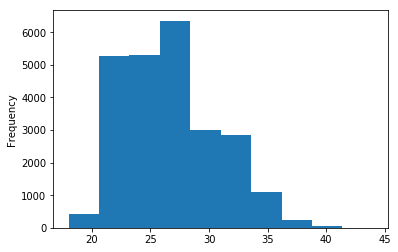

In [38]:
print(nba[['Age', 'G']].corr(method = 'pearson'))
nba['Age'].plot.hist(bins = 10)
print('p-value')
pValueValues = nba[['Age', 'G']]
pValueValues = pValueValues[(pValueValues['Age'] > 0) & (pValueValues['G'] > 0)]
print(pearsonr(pValueValues['Age'], pValueValues['G']))

          Age         G
Age  1.000000  0.038425
G    0.038425  1.000000


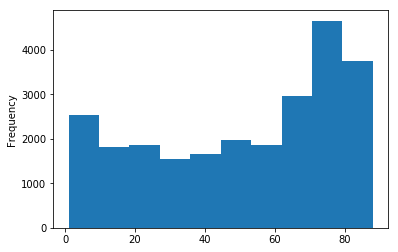

In [39]:
print(nba[['Age', 'G']].corr(method = 'spearman'))
nba['G'].plot.hist(bins = 10)

#### 3

In [64]:
plays = nba.groupby(['Year'])['G'].agg('sum')
print(plays.describe())
print('----------')
print(plays[plays[:] == plays[:].max()])

count       68.000000
mean     18409.014706
std       8214.448475
min       5569.000000
25%       9776.750000
50%      20206.000000
75%      25706.750000
max      29920.000000
Name: G, dtype: float64
----------
Year
2015.0    29920.0
Name: G, dtype: float64


#### 4

In [41]:
results = nba.groupby(['Pos'])['FG'].agg('sum') #4
print(results[results[:] == results[:].max()])
print(results[results[:] == results[:].min()])

Pos
SG    1026059.0
Name: FG, dtype: float64
Pos
C-SF    195.0
Name: FG, dtype: float64


#### 5

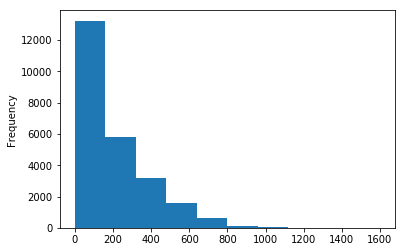

In [45]:
nba.FG.plot.hist() #FieldGoals

#### 6

In [47]:
print(nba.dropna())

Empty DataFrame
Columns: [Unnamed: 0, Year, Player, Pos, Age, Tm, G, GS, MP, PER, TS%, 3PAr, FTr, ORB%, DRB%, TRB%, AST%, STL%, BLK%, TOV%, USG%, blanl, OWS, DWS, WS, WS/48, blank2, OBPM, DBPM, BPM, VORP, FG, FGA, FG%, 3P, 3PA, 3P%, 2P, 2PA, 2P%, eFG%, FT, FTA, FT%, ORB, DRB, TRB, AST, STL, BLK, TOV, PF, PTS]
Index: []

[0 rows x 53 columns]


#### 7

In [48]:
nba['GA'] = nba['FG'] * nba['Age'] #GA = Filed Goals * Age
print(nba.head())

   Unnamed: 0    Year           Player  Pos   Age   Tm     G  GS  MP  PER  \
0           0  1950.0  Curly Armstrong  G-F  31.0  FTW  63.0 NaN NaN  NaN   
1           1  1950.0     Cliff Barker   SG  29.0  INO  49.0 NaN NaN  NaN   
2           2  1950.0    Leo Barnhorst   SF  25.0  CHS  67.0 NaN NaN  NaN   
3           3  1950.0       Ed Bartels    F  24.0  TOT  15.0 NaN NaN  NaN   
4           4  1950.0       Ed Bartels    F  24.0  DNN  13.0 NaN NaN  NaN   

    ...    ORB  DRB  TRB    AST  STL  BLK  TOV     PF    PTS      GA  
0   ...    NaN  NaN  NaN  176.0  NaN  NaN  NaN  217.0  458.0  4464.0  
1   ...    NaN  NaN  NaN  109.0  NaN  NaN  NaN   99.0  279.0  2958.0  
2   ...    NaN  NaN  NaN  140.0  NaN  NaN  NaN  192.0  438.0  4350.0  
3   ...    NaN  NaN  NaN   20.0  NaN  NaN  NaN   29.0   63.0   528.0  
4   ...    NaN  NaN  NaN   20.0  NaN  NaN  NaN   27.0   59.0   504.0  

[5 rows x 54 columns]


#### 8

In [53]:
players = set(nba['Player'])
trueDataTypelist = [] 
for element in players:
    if type(element) == str:
        name = element.split(' ')
        trueDataTypelist.append(name[0])
number = 0
j = 0
count = 0
for element in trueDataTypelist:
    if trueDataTypelist.count(element) > count:
        count = trueDataTypelist.count(element)
        number = j
    j += 1    
print(trueDataTypelist.pop(number))
print(count)

John
75
